# Compute statistics about the global database

* use list_profiles, list_tags, list_deployments
* list files are created in sc_list_profiles.ipynb

In [11]:
from pathlib import Path
import sys
import os
import shutil
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gsw
from IPython.display import display,Image

path_MEOP_analyses = os.fspath(Path.home() / 'MEOP_analyses/')
if not (path_MEOP_analyses in sys.path):
        sys.path.insert(0,path_MEOP_analyses)

import importlib
import meop
importlib.reload(meop)

def copy_file(file_name,src_dir,dst_dir):
    shutil.copyfile(Path(src_dir)/file_name,Path(dst_dir)/file_name)

## Write statistics

In [12]:
config = pd.read_json(meop.processdir / 'configs.json')
list_profiles = pd.read_csv(config.version.CTDnew+'_list_profiles.csv',index_col=['SMRU_PLATFORM_CODE','CYCLE_NUMBER'])
list_tags = pd.read_csv(config.version.CTDnew+'_list_tags.csv',index_col=['SMRU_PLATFORM_CODE'])
list_deployments = pd.read_csv(config.version.CTDnew+'_list_deployments.csv',index_col=['DEPLOYMENT_CODE'])

In [13]:
list_tags[list_profiles_public.LATITUDE<-55]

,DEPLOYMENT_CODE,JULD,LATITUDE,LONGITUDE,N_PROF_TEMP,N_PROF_PSAL,N_PROF_CHLA,PUBLIC,T1,T2,...,S2,remove,Sremove,comment,variable_offset,instr_id,year,period,continuous,prefix
SMRU_PLATFORM_CODE,,,,,,,,,,,,,,,,,,,,,
BM01-544-12,BM01,2012-09-22 04:19:59.999996,71.5993,-156.2952,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
BM02-01-17,BM02,2018-09-26 00:34:00,65.3328,-162.1162,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
BM02-03-17,BM02,2018-09-25 20:53:00.000005,71.5043,-155.8101,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
BM02-05-17,BM02,2017-08-29 02:06:00.000002,69.9586,-131.6117,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,1.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
BM02-06-17,BM02,2017-08-29 08:12:00,69.9351,-131.9072,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wd13-910-18,wd13,2019-11-20 07:19:59.999996,-66.6417,140.1051,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
wd13-911-18,wd13,2019-11-23 15:10:00.000004,-66.5975,140.0247,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN
wd3-CTD1-07,wd3,2007-02-21 05:19:58.999998,-66.5794,139.9860,NaN,NaN,NaN,1.0,0.0,0.0,...,0.0,1.0,0.0,no comment,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
list_deployments_public = list_deployments[list_deployments.PUBLIC==1]
list_profiles_public = list_profiles[list_profiles.DEPLOYMENT_CODE.isin(list_deployments_public.index.to_list())]

In [15]:
print('Number of valid T profiles, total :',list_profiles.N_TEMP.count())
print('Number of valid T profiles, public:',list_profiles_public.N_TEMP.count())
print('Number of valid T profiles, public, south of 55S: ',list_profiles_public[list_profiles_public.LATITUDE<-55].N_TEMP.count())

Number of valid T profiles, total : 656292
Number of valid T profiles, public: 590537
Number of valid T profiles, public, south of 55S:  272609


In [16]:
print('Number of valid T profiles, total :',list_profiles.N_PSAL.count())
print('Number of valid T profiles, public:',list_profiles_public.N_PSAL.count())
print('Number of valid T profiles, public, south of 55S: ',list_profiles_public[list_profiles_public.LATITUDE<-55].N_PSAL.count())

Number of valid T profiles, total : 520421
Number of valid T profiles, public: 457743
Number of valid T profiles, public, south of 55S:  234952


In [17]:
# select tags with at least one profile south of 55S
index_tags = list_profiles_public[list_profiles_public.LATITUDE<-55].index.get_level_values('SMRU_PLATFORM_CODE').unique()
print('Number of valid tags, public, south of 55S: ',len(index_tags))

Number of valid tags, public, south of 55S:  781


In [18]:
# select tags with at least one Chla profile
index_tags = list_profiles_public[list_profiles_public.N_CHLA>0].index.get_level_values('SMRU_PLATFORM_CODE').unique()
print('Number of valid tags, public, with chla: ',len(index_tags))

# select tags with at least one Chla profile south of 50S
index_tags = list_profiles_public[(list_profiles_public.N_CHLA>0)&(list_profiles_public.LATITUDE<-55)].index.get_level_values('SMRU_PLATFORM_CODE').unique()
print('Number of valid tags, public, with chla: ',len(index_tags))

# Number of profiles of Chla
print('')
print('Number of valid F profiles, total : ',list_profiles[list_profiles.N_CHLA>0].N_CHLA.count())
print('Number of valid F profiles, public: ',list_profiles_public[list_profiles_public.N_CHLA>0].N_CHLA.count())
print('Number of valid F profiles, public, south of 55S: ',list_profiles_public[(list_profiles_public.N_CHLA>0)&(list_profiles_public.LATITUDE<-55)].N_CHLA.count())

Number of valid tags, public, with chla:  108
Number of valid tags, public, with chla:  26

Number of valid F profiles, total :  26801
Number of valid F profiles, public:  26328
Number of valid F profiles, public, south of 55S:  3528


# Global maps

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7feffa8b3050>)

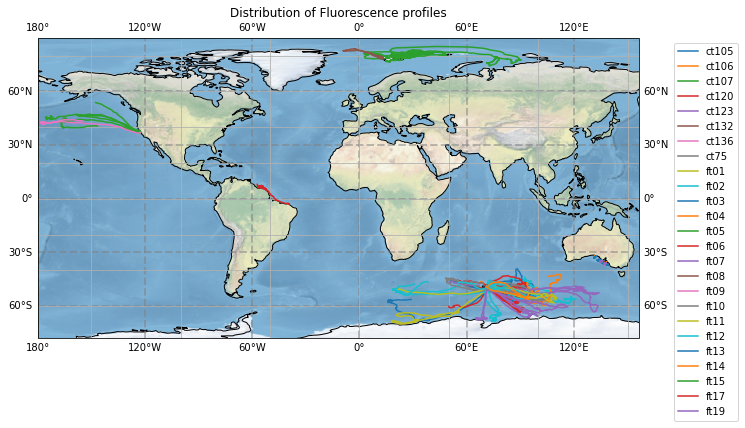

In [19]:
importlib.reload(meop)
meop.plot_map_deployments(list_profiles_public[list_profiles_public.N_CHLA>0],
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of Fluorescence profiles',
                                    namefig='global_map_chla_profiles.png')

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7feffb0a8210>)

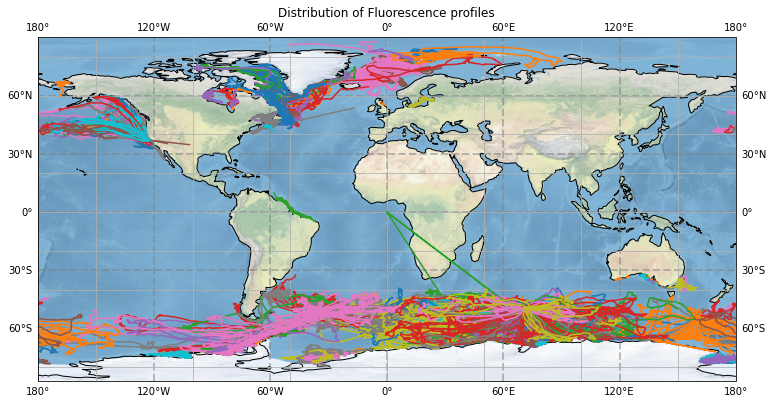

In [20]:
importlib.reload(meop)
meop.plot_map_deployments(list_profiles_public,
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of Fluorescence profiles',
                                    namefig='global_map_chla_profiles.png',
                         legend=False)

In [1]:
meop.plot_map_deployments?

Object `meop.plot_map_deployments` not found.


## Publish data in public folder

In [21]:
publish_data = False
if publish_data:

    config = 'jupyter_froqu_pc207_linux'
    folder_public = pd.read_json(meop.processdir / 'configs.json').configs[config]['public']
    
    list_tags = pd.read_csv(config.version.CTDnew+'_list_tags.csv',index_col=['SMRU_PLATFORM_CODE'])
    list_tags_public = list_tags[list_tags.PUBLIC==1]
    for COUNTRY in list_tags_public.COUNTRY.unique():
        print(COUNTRY)
        folder_country = folder_public / COUNTRY
        folder_country.mkdir(parents=True, exist_ok=True)
        folder_data = folder_country / 'DATA'
        folder_data.mkdir(parents=True, exist_ok=True)
        list_tags_country = list_tags_public.loc[list_tags_public.COUNTRY==COUNTRY,['SMRU_PLATFORM_CODE']]
        for tag in list_tags_country.values[:,0]:
            ncfile_in = meop.fname_prof(tag,qf='hr2')
            ncfile_out = folder_data / ncfile_in.name
            if ncfile_in.exists() and (not ncfile_out.exists()):
                shutil.copyfile(ncfile_in,ncfile_out)

In [389]:
# list public tags
list_depl_public = list_deployments.loc[list_deployments.PUBLIC==1,['DEPLOYMENT_CODE','PI_CODE','COUNTRY']]
list_tags_public = list_tags.merge(list_depl_public,on='DEPLOYMENT_CODE')
list_tags_public = list_tags_public[['SMRU_PLATFORM_CODE','DEPLOYMENT_CODE','PI_CODE','COUNTRY']]

In [390]:
list_tags_public

,SMRU_PLATFORM_CODE,DEPLOYMENT_CODE,PI_CODE,COUNTRY
0,awru1-A-06,awru1,HINDELL,AUSTRALIA
1,awru1-B-06,awru1,HINDELL,AUSTRALIA
2,awru1-C-06,awru1,HINDELL,AUSTRALIA
3,bs1-53127-04,bs1,STANILAN,UK
4,bs1-53128-04,bs1,STANILAN,UK
...,...,...,...,...
1572,wd10-680-17,wd10,CNRSPEPS,FRANCE
1573,wd10-681-17,wd10,CNRSPEPS,FRANCE
1574,wd3-CTD1-07,wd3,HINDELL,AUSTRALIA
1575,wd3-CTD2-07,wd3,HINDELL,AUSTRALIA


## Create plots in public folder

Using matplotlib backend: agg
AUSTRALIA
wd04-896-11
wd04-880-11
wd04-900-11
wd04-883-11
wd04-908-11
wd04-897-11
wd04-899-11
wd04-881-11
wd04-838-11
wd04-884-11
wd04-909-11
wd04-906-11
wd04-910-11
wd04-907-11
wd04-898-11
wd04-911-11
wd04-836-11
awru1-B-06
awru1-C-06
awru1-A-06
ct149-928-18
ct149-924-18
ct149-930-18
ct149-923-18
ct149-922-18
ct149-929-18
ct149-926-18
ct149-925-18
ct149-927-18
ct2-9920-04
ct2-9919-04
ct2-9925-04
ct2-9916-04
ct36-E-09
ct36-D-09
ct36-R1-09
ct36-A-09
ct36-R4-09
ct36-C-09
ct36-B-09
ct36-F-09
ct38w-Elodie-08
ct38w-QueenEliz-08
ct38w-Denise-08
ct38w-Mathilde-08
ct47-I-09
ct47-G-09
ct47-C-09
ct47-E-09
ct47-F-09
ct47-A-09
ct47-B-09
ct47-D-09
ct6-10006-05
ct6-10018-05
ct6-9920-05


KeyboardInterrupt: 

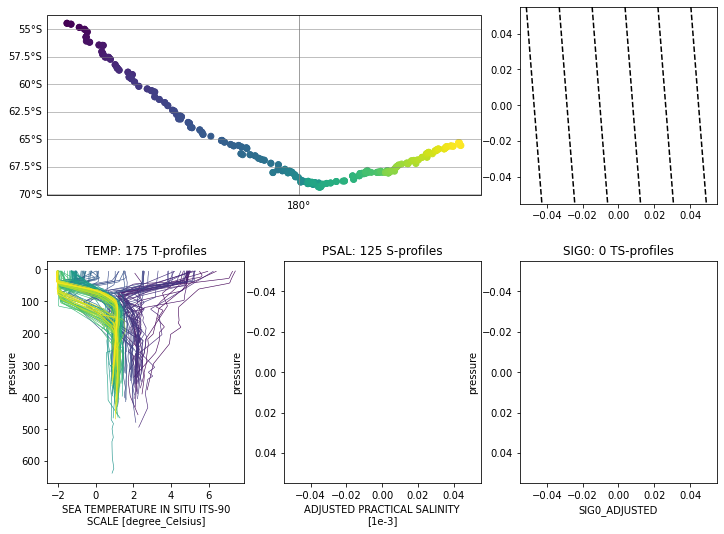

In [104]:
publish_data = False
if publish_data:
    
    %matplotlib auto

    config = 'jupyter_froqu_pc207_linux'
    folder_public = pd.read_json(meop.processdir / 'configs.json').configs[config]['public']
    
    list_tags = pd.read_csv(config.version.CTDnew+'_list_tags.csv',index_col=['SMRU_PLATFORM_CODE'])
    list_tags_public = list_tags[list_tags.PUBLIC==1]
    for COUNTRY in list_tags_public.COUNTRY.unique():
        print(COUNTRY)
        folder_plots = folder_public / COUNTRY / 'PLOTS'
        folder_plots.mkdir(parents=True, exist_ok=True)
        list_tags_country = list_tags_public.loc[list_tags_public.COUNTRY==COUNTRY,['SMRU_PLATFORM_CODE']]
        for tag in list_tags_country.values[:,0]:
            print(tag)
            if meop.fname_prof(tag,qf='hr2').is_file():
                with meop.read_ncfile(tag,qf='hr2') as ds:
                    ds = ds.assign_coords(pressure=("N_LEVELS", ds.PRES[0,:]))
                    ds['SIG0_ADJUSTED'] = (('N_PROF','N_LEVELS'),gsw.sigma0(ds.PSAL_ADJUSTED,ds.TEMP_ADJUSTED))
                    depl = meop.EXP_from_SMRU_CODE(tag)
                    namefig = folder_plots / (tag+'_data_description.png')
                    if not namefig.exists():
                        meop.plot_data_tags(ds,namefig=namefig)
                        plt.close()